In [1]:
!pip install beautifulsoup4

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
web = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T').text
soup = BeautifulSoup(web, 'html.parser')
#soup.prettify

In [2]:
table = soup.find('table', attrs={'class': 'wikitable'}) # extract html tag table with wikitable class
#data_table = name_table.text.strip() # extract the whole table into text
th = table.find_all('th') # find the table headers: ['Postcode', 'Borough', 'Neighbourhood']
tr = table.find_all('tr') # find all the table rows

In [3]:
# define the column names
column = []
for i in th: # <th> tag contains the table headers which we append to a columns list
    column.append(i.text.strip())
rows = []
for t in tr[1:]: # for each <tr> tag found in the table
    t_all = t.find_all('td') # find all <td> tags in each <tr> tag
    row = [t.text.strip() for t in t_all]
    rows.append(row)

# instantiate the dataframe
ab = pd.DataFrame(rows, columns=column) 
ab

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
176,T6Z,Not assigned,Not assigned,Not assigned,Not assigned
177,T7Z,Stony Plain,Not assigned,53.5202,-114.0135
178,T8Z,Not assigned,Not assigned,Not assigned,Not assigned


In [4]:
#Ignore cells with a borough that is Not assigned.
ab= ab[ab.Borough != 'Not assigned']
ab.tail()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
171,T1Z,Rocky View,Not assigned,Not assigned,Not assigned
172,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873
173,T3Z,Redwood Meadows,Not assigned,50.9821,-114.5178
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
177,T7Z,Stony Plain,Not assigned,53.5202,-114.0135


In [5]:
ab['Neighborhood'][ab['Neighborhood']=='Not assigned'] =ab['Borough']
ab.tail()

C:\Users\DavidSon\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,Postal Code,Borough,Neighborhood,Latitude,Longitude
171,T1Z,Rocky View,Rocky View,Not assigned,Not assigned
172,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873
173,T3Z,Redwood Meadows,Redwood Meadows,50.9821,-114.5178
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
177,T7Z,Stony Plain,Stony Plain,53.5202,-114.0135


In [6]:
ab= ab[ab.Latitude != 'Not assigned']
ab.tail()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
168,T7Y,"Spruce Grove, Parkland County, Lac Ste. Anne C...","Spruce Grove, Parkland County, Lac Ste. Anne C...",53.4495,-113.7135
172,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873
173,T3Z,Redwood Meadows,Redwood Meadows,50.9821,-114.5178
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
177,T7Z,Stony Plain,Stony Plain,53.5202,-114.0135


In [7]:
ab= ab[ab.Longitude != 'Not assigned']
ab.tail()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
168,T7Y,"Spruce Grove, Parkland County, Lac Ste. Anne C...","Spruce Grove, Parkland County, Lac Ste. Anne C...",53.4495,-113.7135
172,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873
173,T3Z,Redwood Meadows,Redwood Meadows,50.9821,-114.5178
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
177,T7Z,Stony Plain,Stony Plain,53.5202,-114.0135


In [8]:
ab.groupby('Borough').count()['Neighborhood']

Borough
Airdrie                                                         2
Athabasca                                                       1
Banff                                                           1
Barrhead                                                        1
Beaumont                                                        1
Bonnyville                                                      1
Brooks                                                          1
Calgary                                                        34
Camrose                                                         1
Canmore                                                         1
Chestermere                                                     1
Coaldale                                                        1
Cochrane                                                        1
Cold Lake                                                       1
Devon                                                           1
Dr

In [9]:
edmonton = ab[ab['Borough'].str.contains('Edmonton')]
edmonton.reset_index(inplace=True)
edmonton.drop('index', axis=1, inplace=True)
edmonton.head()

C:\Users\DavidSon\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
1,T6A,Edmonton,North Capilano,53.5483,-113.408
2,T5B,Edmonton,"East North Central, West Beverly",53.5766,-113.4608
3,T6B,Edmonton,"SE Capilano, West Southeast Industrial, East B...",53.5322,-113.4404
4,T5C,Edmonton,Central Londonderry,53.6129,-113.4572


In [10]:
print(edmonton.groupby('Borough').count()['Neighborhood'])

Borough
Edmonton    38
Name: Neighborhood, dtype: int64


In [11]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

In [12]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

In [13]:
address = 'Edmonton, AB'

geolocator = Nominatim(user_agent="edmonton_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


In [40]:
import numpy as np
map_edmonton = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, borough, neighbourhood in zip(edmonton['Latitude'], edmonton['Longitude'], edmonton['Borough'], edmonton['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_edmonton)

map_edmonton

In [15]:
CLIENT_ID = 'MDGDHBBVJCGMWT5ZPDIZZ0E1SGUAZIZU4BHYOTWDREXBKRST' # your Foursquare ID
CLIENT_SECRET = '2KT2WDDAVFQEVV4EGEFT3HM4ER2V1EZVMCWHXWLSYRCVA0HD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
RADIUS = 500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    lat, 
    lng,
    VERSION, 
    RADIUS, 
    LIMIT)

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
edmonton_venues = getNearbyVenues(names=edmonton['Neighborhood'],
                                latitudes=edmonton['Latitude'],
                                longitudes=edmonton['Longitude'])

West Clareview, East Londonderry
North Capilano
East North Central, West Beverly
SE Capilano, West Southeast Industrial, East Bonnie Doon
Central Londonderry
Central Bonnie Doon
West Londonderry, East Calder
South Bonnie Doon, East University
North Central, Queen Mary Park, Blatchford
West University, Strathcona Place
NorthDowntown Fringe, East Downtown Fringe
Southgate, North Riverbend
North Downtown
Kaskitayo, Aspen Gardens
South Downtown, South Downtown Fringe (Alberta Provincial Government)
West Mill Woods
North Westmount, West Calder, East Mistatim
East Mill Woods
South Westmount, Groat Estate, East Northwest Industrial
Southwest Edmonton
Glenora, SW Downtown Fringe
South Industrial
North Jasper Place
East Southeast Industrial, South Clover Bar
Central Jasper Place, Buena Vista
Southgate, North Riverbend
West Northwest Industrial, Winterburn
North Clover Bar
West Jasper Place, West Edmonton Mall
The Meadows
Central Mistatim
The Palisades, West Castle Downs
Central Beverly
Heritage

In [19]:
edmonton_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Central Beverly,5,5,5,5,5,5
Central Bonnie Doon,6,6,6,6,6,6
"Central Jasper Place, Buena Vista",9,9,9,9,9,9
Central Londonderry,1,1,1,1,1,1
Central Mistatim,3,3,3,3,3,3
East Castledowns,4,4,4,4,4,4
East Mill Woods,2,2,2,2,2,2
"East North Central, West Beverly",5,5,5,5,5,5
"East Southeast Industrial, South Clover Bar",3,3,3,3,3,3


In [20]:
edmonton_venues['Venue Category'].unique()[:200]

array(['Buffet', 'Mexican Restaurant', 'Toy / Game Store', 'Record Shop',
       'Bus Station', 'Playground', 'Park', 'Ski Trail', 'Grocery Store',
       'Department Store', 'Smoke Shop', 'Arts & Crafts Store',
       'Business Service', 'Construction & Landscaping',
       'American Restaurant', 'Water Park', 'Electronics Store',
       'Cosmetics Shop', 'Trail', 'Comic Shop', 'Butcher', 'Bakery',
       'Dog Run', 'Recreation Center', 'Hockey Arena', 'Baseball Field',
       'Mediterranean Restaurant', 'Coffee Shop', 'Pharmacy',
       'Flower Shop', 'Café', 'Music Venue', 'Bank', 'Theater',
       'College Gym', 'College Residence Hall', 'Sandwich Place', 'Diner',
       'Pub', 'Paper / Office Supplies Store', 'Fast Food Restaurant',
       'Gift Shop', 'Soccer Stadium', 'Gym', 'Furniture / Home Store',
       'Restaurant', 'Italian Restaurant', 'Whisky Bar', 'Wine Shop',
       'Tapas Restaurant', 'Nightclub', 'Brewery', 'Indian Restaurant',
       'Food Truck', 'Gay Bar', 'Miscel

In [21]:
"Asian Restaurant" in edmonton_venues['Venue Category'].unique()

True

In [22]:
ed_onehot = pd.get_dummies(edmonton_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ed_onehot['Neighborhoods'] = edmonton_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ed_onehot.columns[-1]] + list(ed_onehot.columns[:-1])
ed_onehot = ed_onehot[fixed_columns]

print(ed_onehot.shape)
ed_onehot.head()

(302, 117)


,Neighborhoods,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Baseball Field,Baseball Stadium,Big Box Store,Bookstore,...,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Shop
0,"West Clareview, East Londonderry",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"West Clareview, East Londonderry",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"West Clareview, East Londonderry",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,"West Clareview, East Londonderry",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"West Clareview, East Londonderry",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
ed_grouped = ed_onehot.groupby('Neighborhoods').mean().reset_index()
ed_grouped.head()

,Neighborhoods,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Baseball Field,Baseball Stadium,Big Box Store,Bookstore,...,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Shop
0,Central Beverly,0.000000,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Central Bonnie Doon,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.166667,0.0,0.0
2,"Central Jasper Place, Buena Vista",0.000000,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,Central Londonderry,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,Central Mistatim,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.0


In [24]:
num_top_venues = 5

for hood in ed_grouped['Neighborhoods']:
    print("----"+hood+"----")
    temp = ed_grouped[ed_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Beverly----
                 venue  freq
0     Department Store   0.2
1           Smoke Shop   0.2
2        Grocery Store   0.2
3                 Park   0.2
4  Arts & Crafts Store   0.2


----Central Bonnie Doon----
                 venue  freq
0  American Restaurant  0.17
1           Water Park  0.17
2       Cosmetics Shop  0.17
3    Electronics Store  0.17
4                Trail  0.17


----Central Jasper Place, Buena Vista----
              venue  freq
0              Café  0.11
1       Pizza Place  0.11
2    Sandwich Place  0.11
3  Sushi Restaurant  0.11
4       Salad Place  0.11


----Central Londonderry----
                        venue  freq
0  Construction & Landscaping   1.0
1         American Restaurant   0.0
2     New American Restaurant   0.0
3                       Plaza   0.0
4                  Playground   0.0


----Central Mistatim----
                     venue  freq
0          Warehouse Store  0.33
1             Liquor Store  0.33
2                   Casino

In [25]:
def return_most_common_venues(row, num_top_venues):    
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = ed_grouped['Neighborhoods']

for ind in np.arange(ed_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ed_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Beverly,Department Store,Smoke Shop,Grocery Store,Park,Arts & Crafts Store,Vietnamese Restaurant,Museum,Pizza Place,Pharmacy,Pet Store
1,Central Bonnie Doon,American Restaurant,Water Park,Cosmetics Shop,Electronics Store,Trail,Grocery Store,Paper / Office Supplies Store,Noodle House,Office,Paintball Field
2,"Central Jasper Place, Buena Vista",Café,Pizza Place,Sandwich Place,Sushi Restaurant,Salad Place,Convenience Store,Fast Food Restaurant,Liquor Store,Bakery,Pharmacy
3,Central Londonderry,Construction & Landscaping,American Restaurant,New American Restaurant,Plaza,Playground,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store
4,Central Mistatim,Warehouse Store,Liquor Store,Casino,American Restaurant,New American Restaurant,Plaza,Playground,Pizza Place,Pharmacy,Pet Store


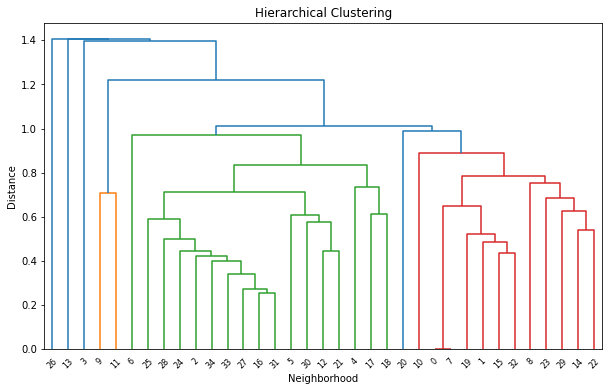

In [41]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

data = ed_grouped.iloc[:,3:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering')
plt.xlabel('Neighborhood')
plt.ylabel('Distance')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

## Cluster

In [28]:
# set number of clusters
kclusters = 6

ed_grouped_clustering = ed_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ed_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:7] 

array([4, 0, 0, 1, 0, 0, 0])

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'clusterlabels', kmeans.labels_)

ed_merged_1 = edmonton

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ed_merged_1 = ed_merged_1.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhood')

ed_merged_1.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413,0.0,Record Shop,Mexican Restaurant,Bus Station,Buffet,Toy / Game Store,Pharmacy,Pet Store,Park,New American Restaurant,Pizza Place
1,T6A,Edmonton,North Capilano,53.5483,-113.408,4.0,Playground,Park,Ski Trail,Bus Station,American Restaurant,New American Restaurant,Plaza,Pizza Place,Pharmacy,Pet Store
2,T5B,Edmonton,"East North Central, West Beverly",53.5766,-113.4608,4.0,Department Store,Smoke Shop,Grocery Store,Park,Arts & Crafts Store,Vietnamese Restaurant,Museum,Pizza Place,Pharmacy,Pet Store
3,T6B,Edmonton,"SE Capilano, West Southeast Industrial, East B...",53.5322,-113.4404,0.0,Business Service,Playground,Music Venue,Plaza,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store,Paintball Field
4,T5C,Edmonton,Central Londonderry,53.6129,-113.4572,1.0,Construction & Landscaping,American Restaurant,New American Restaurant,Plaza,Playground,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store


In [30]:
ed_merged_1 = ed_merged_1.dropna()
ed_merged_1['clusterlabels'] = ed_merged_1.clusterlabels.astype(int)
ed_merged_1.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413,0,Record Shop,Mexican Restaurant,Bus Station,Buffet,Toy / Game Store,Pharmacy,Pet Store,Park,New American Restaurant,Pizza Place
1,T6A,Edmonton,North Capilano,53.5483,-113.408,4,Playground,Park,Ski Trail,Bus Station,American Restaurant,New American Restaurant,Plaza,Pizza Place,Pharmacy,Pet Store
2,T5B,Edmonton,"East North Central, West Beverly",53.5766,-113.4608,4,Department Store,Smoke Shop,Grocery Store,Park,Arts & Crafts Store,Vietnamese Restaurant,Museum,Pizza Place,Pharmacy,Pet Store
3,T6B,Edmonton,"SE Capilano, West Southeast Industrial, East B...",53.5322,-113.4404,0,Business Service,Playground,Music Venue,Plaza,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store,Paintball Field
4,T5C,Edmonton,Central Londonderry,53.6129,-113.4572,1,Construction & Landscaping,American Restaurant,New American Restaurant,Plaza,Playground,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ed_merged_1['Latitude'], ed_merged_1['Longitude'], ed_merged_1['Neighborhood'], ed_merged_1['clusterlabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
#cluster 1
ed_merged_1.loc[ed_merged_1['clusterlabels'] == 0, ed_merged_1.columns[[1] +[2] + list(range(5, ed_merged_1.shape[1]))]]

,Borough,Neighborhood,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Edmonton,"West Clareview, East Londonderry",0,Record Shop,Mexican Restaurant,Bus Station,Buffet,Toy / Game Store,Pharmacy,Pet Store,Park,New American Restaurant,Pizza Place
3,Edmonton,"SE Capilano, West Southeast Industrial, East B...",0,Business Service,Playground,Music Venue,Plaza,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store,Paintball Field
5,Edmonton,Central Bonnie Doon,0,American Restaurant,Water Park,Cosmetics Shop,Electronics Store,Trail,Grocery Store,Paper / Office Supplies Store,Noodle House,Office,Paintball Field
6,Edmonton,"West Londonderry, East Calder",0,Dog Run,Bakery,Baseball Field,Arts & Crafts Store,Recreation Center,Grocery Store,Butcher,Comic Shop,Hockey Arena,Park
7,Edmonton,"South Bonnie Doon, East University",0,American Restaurant,Pharmacy,Mediterranean Restaurant,Flower Shop,Coffee Shop,Nightclub,Plaza,Playground,Pizza Place,Pet Store
8,Edmonton,"North Central, Queen Mary Park, Blatchford",0,Music Venue,Café,Bakery,Bank,Pharmacy,Grocery Store,Paintball Field,Nightclub,Noodle House,Office
9,Edmonton,"West University, Strathcona Place",0,College Gym,Theater,Pub,Fast Food Restaurant,Diner,Bank,Paper / Office Supplies Store,Coffee Shop,College Residence Hall,Sandwich Place
10,Edmonton,"NorthDowntown Fringe, East Downtown Fringe",0,Soccer Stadium,Gym,Gift Shop,Grocery Store,Café,Pet Store,Park,Paper / Office Supplies Store,Music Venue,Office
11,Edmonton,"Southgate, North Riverbend",0,Furniture / Home Store,Restaurant,Coffee Shop,Sandwich Place,American Restaurant,Playground,Pizza Place,Pharmacy,Pet Store,Park
12,Edmonton,North Downtown,0,Coffee Shop,Sandwich Place,Pub,Restaurant,Hotel,Fast Food Restaurant,Italian Restaurant,Café,Gastropub,New American Restaurant


In [33]:
#cluster 2
ed_merged_1.loc[ed_merged_1['clusterlabels'] == 1, ed_merged_1.columns[[1] +[2] + list(range(5, ed_merged_1.shape[1]))]]

,Borough,Neighborhood,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Edmonton,Central Londonderry,1,Construction & Landscaping,American Restaurant,New American Restaurant,Plaza,Playground,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store


In [34]:
#cluster 3
ed_merged_1.loc[ed_merged_1['clusterlabels'] == 2, ed_merged_1.columns[[1] +[2] + list(range(5, ed_merged_1.shape[1]))]]

,Borough,Neighborhood,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Edmonton,"East Southeast Industrial, South Clover Bar",2,Café,Housing Development,Bus Station,American Restaurant,Plaza,Playground,Pizza Place,Pharmacy,Pet Store,Park


In [35]:
#cluster 4
ed_merged_1.loc[ed_merged_1['clusterlabels'] == 3, ed_merged_1.columns[[1] +[2] + list(range(5, ed_merged_1.shape[1]))]]

,Borough,Neighborhood,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Edmonton,"Kaskitayo, Aspen Gardens",3,Lake,American Restaurant,Music Venue,Plaza,Playground,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store


In [36]:
#cluster 5
ed_merged_1.loc[ed_merged_1['clusterlabels'] == 4, ed_merged_1.columns[[1] +[2] + list(range(5, ed_merged_1.shape[1]))]]

,Borough,Neighborhood,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Edmonton,North Capilano,4,Playground,Park,Ski Trail,Bus Station,American Restaurant,New American Restaurant,Plaza,Pizza Place,Pharmacy,Pet Store
2,Edmonton,"East North Central, West Beverly",4,Department Store,Smoke Shop,Grocery Store,Park,Arts & Crafts Store,Vietnamese Restaurant,Museum,Pizza Place,Pharmacy,Pet Store
14,Edmonton,"South Downtown, South Downtown Fringe (Alberta...",4,Park,French Restaurant,Sandwich Place,Hotel,Baseball Stadium,Thai Restaurant,Paintball Field,Noodle House,Office,American Restaurant
20,Edmonton,"Glenora, SW Downtown Fringe",4,Portuguese Restaurant,Park,Music Venue,Plaza,Playground,Pizza Place,Pharmacy,Pet Store,Paper / Office Supplies Store,Paintball Field
21,Edmonton,South Industrial,4,Park,Gym,Golf Driving Range,American Restaurant,Music Venue,Playground,Pizza Place,Pharmacy,Pet Store,Paper / Office Supplies Store
32,Edmonton,Central Beverly,4,Department Store,Smoke Shop,Grocery Store,Park,Arts & Crafts Store,Vietnamese Restaurant,Museum,Pizza Place,Pharmacy,Pet Store


In [37]:
#cluster 6
ed_merged_1.loc[ed_merged_1['clusterlabels'] == 5, ed_merged_1.columns[[1] +[2] + list(range(5, ed_merged_1.shape[1]))]]

,Borough,Neighborhood,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Edmonton,Southwest Edmonton,5,Paintball Field,American Restaurant,Music Venue,Plaza,Playground,Pizza Place,Pharmacy,Pet Store,Park,Paper / Office Supplies Store
